# Stastistical modeling and computation
## Week 1 Assignment - Part 3: Dimensionality reduction

This assignment explores dimensionality reduction techniques to analyze high-dimensional data and identify meaningful patterns.

🔹 Key Tasks Covered:

Data Preprocessing – Selecting a specific year, normalizing variables, and preparing data for analysis.
Principal Component Analysis (PCA) – Reducing dimensionality and visualizing patterns in the data.
Feature Scaling & Centering – Using StandardScaler to ensure meaningful comparisons across variables.
📂 Tools & Libraries Used:
✔ pandas – Data handling
✔ scikit-learn – PCA and feature scaling
✔ matplotlib / seaborn – Data visualization 


In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Getting started

The first step of the analysis is to prepare the dataset. 
Perform the following steps:

1. Read in the dataset.
2. Select one year in the dataset to use (your choice which year it is). You can drop the rest of the data.
3. Separate the variables `Year`, `Country` and `Status` from the other variables. They will not be used in the DR. You will need  `Country` and `Status` later.
4. Scale and center the remaining variables. You can use `StandardScaler` method from `scikit-learn` to do this.

In [2]:
# Read in the dataset 
life_expectancy = pd.read_csv('LifeExpectancy.csv')
life_expectancy.head(10)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country,Status
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Afghanistan,Developing
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Afghanistan,Developing
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Afghanistan,Developing
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Afghanistan,Developing
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Afghanistan,Developing
5,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,Afghanistan,Developing
6,2009,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,...,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,Afghanistan,Developing
7,2008,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,...,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,Afghanistan,Developing
8,2007,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,...,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,Afghanistan,Developing
9,2006,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,...,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,Afghanistan,Developing


In [3]:
# Select one year to use for the analysis 
life_expectancy_2010 = life_expectancy[life_expectancy["Year"] == 2010]

In [ ]:
# Separate the variables Year, Country and Status from the dataset.
#Removed because they were strings (characters) and years because we only need one

variables = life_expectancy_2010.drop(['Year','Country','Status'], axis=1)

In [ ]:
# Import the StandardScaler (GPT)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the dataset

scaled_data = scaler.fit_transform(variables) 

**Question**: What is the purpose of scaling and centering the data? Is it neccessary?

Answer:
The standard scaler help to standardize the features so they are on comparable scales. While centering focuses in adjusting the features to have a mean of 0 because non centered data can provide misleading results.
This results neccesary when comparing variables with larger ranges to anothers with smaller ranges, for exmaple: The population ranges between 123 and  242524123 while the HIV ranges from 0.01 to 21.6 . This ensures data distance measures to be equal and meaningful. 

### 2. Principal Component Analysis

First you will perform PCA on the dataset that you prepared. Perform the following steps:

1. Import the PCA method.
2. Create an instance of the PCA method that results in 2 PCs.
3. Fit the instance to the data and transform it.

You will also plot the datapoints with resepct to the two PC.


In [79]:
# import the PCA method
from sklearn.decomposition import PCA
# create an instance of the PCA method that results in 2 PCs
pca = PCA(n_components=2)
# fit it to the data and transform the data.
Life_pca = pca.fit_transform(scaled_data)

In [80]:
Life_pca.shape

(183, 2)

183 rows, 2 columns (components)

In [81]:
pca.components_

array([[ 0.33730815, -0.27415197, -0.1734566 ,  0.22326351,  0.21911608,
         0.13149882, -0.10213807,  0.2596448 , -0.17963874,  0.18700079,
         0.1572043 ,  0.1937745 , -0.18616396,  0.22594186, -0.00597083,
        -0.28942433, -0.28351909,  0.31742381,  0.32837146],
       [ 0.1572804 , -0.14592601,  0.55532518,  0.06014702,  0.16077522,
         0.01891344,  0.19933179,  0.00200806,  0.54788825,  0.11125669,
        -0.02774486,  0.12671875, -0.136204  ,  0.16122907,  0.19798554,
         0.23199143,  0.23927378,  0.16802938,  0.15356989]])

19 variables, 2 components

In [82]:
pca.explained_variance_ratio_

array([0.33257833, 0.11552186])

The first component explains 99% of the variance
The second component exlpains very little of the variance (.00000018)

In [83]:
pca.explained_variance_ratio_.sum()  

0.4481001909142905

In total both components explain 99% of the variance

**Question**: How much of the variance do the two PCs explain?

Answer: In total both components explain 99% of the variance

**Question (Extra)**: Inspect the loadings of the two PCs with respect to the variables. How do the variables align?

Answer: 

Now plot the data with resepct to the two PCs.  Label the datapoints with the country name.  
a. Color the points depending on the variable `status`.  
b. (Bonus) Color the points depending on continent. This variable is not in the dataset so you will have to add it. 

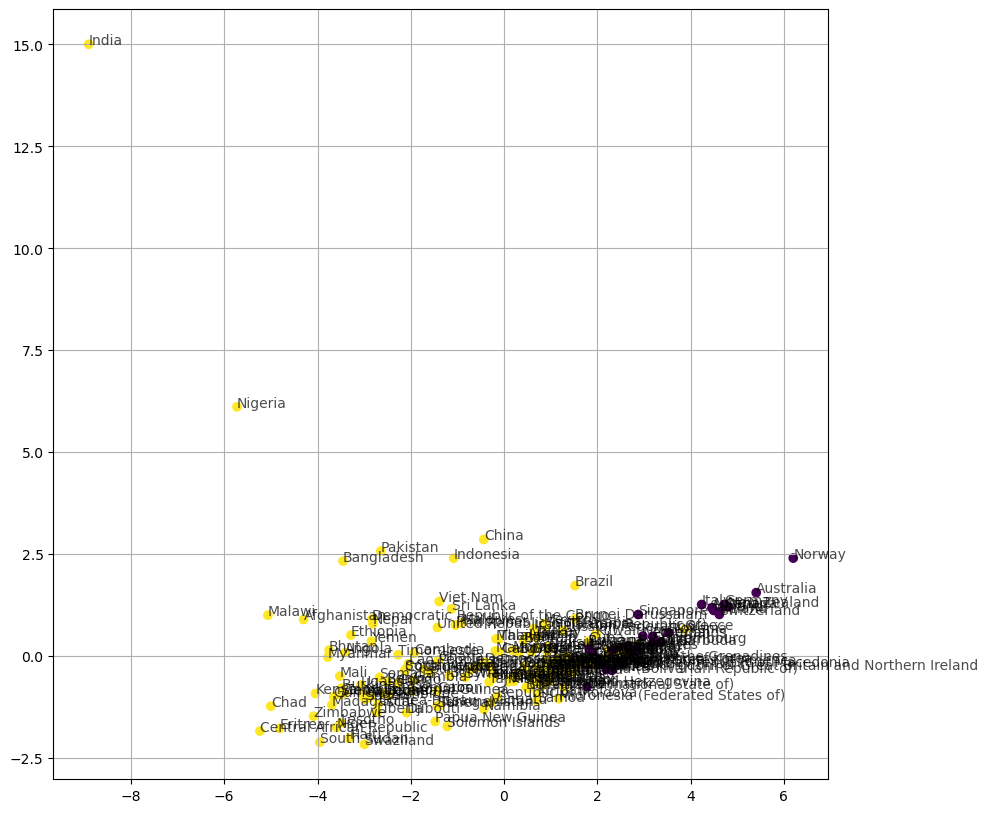

In [84]:
# plot the PCA results
plt.figure(figsize=(10,10))
plt.scatter(Life_pca[:, 0], Life_pca[:, 1],c=life_expectancy_2010["Status"].astype('category').cat.codes)
for i, label in enumerate(life_expectancy_2010["Country"]):  # Replace "Country" with your desired variable
    plt.annotate(
        label, 
        (Life_pca[i, 0], Life_pca[i, 1]),
        fontsize=10,       # Font size for labels
        alpha=0.7         # Transparency for labels
    )
plt.grid(True)
plt.show()

Yellow=developing countries
Purple=developed countries

**Question**: Explain the relationship between the `status` and the two PCs.

Answer: Status points to the level of development of the countries. Developing countries are closer between them. While developed countries are separated from the rest.
Developing countries are spread within X axis and developed countries are on Y axis. 

**Question**: (Bonus) Eplain the relationship between continent and the two PCs.

Answer:

### 3. Multidimensional Scaling

Second you will perform MDS on the dataset that you prepared. Perform the following steps:

1. Import the MDS method.
2. Create an instance of the MDS method that results in 2 dimensions. It should be metric MDS.  
3. Fit the instance to the data and transform it.  
4. Plot the datapoints with resepct to the two dimensions.  
    a. Color the datapoints w.r.t `status``.  
    b. (Bonus) Color the datapoints w.r.t. continent.

In [85]:
# import the MDS method
from sklearn.manifold import MDS
# create an instance of a metric MDS method with 2 dimensions
mds = MDS(n_components=2, normalized_stress=False, metric=True)
# fit it to the data and transform the data. 
life_mds = mds.fit_transform(scaled_data)

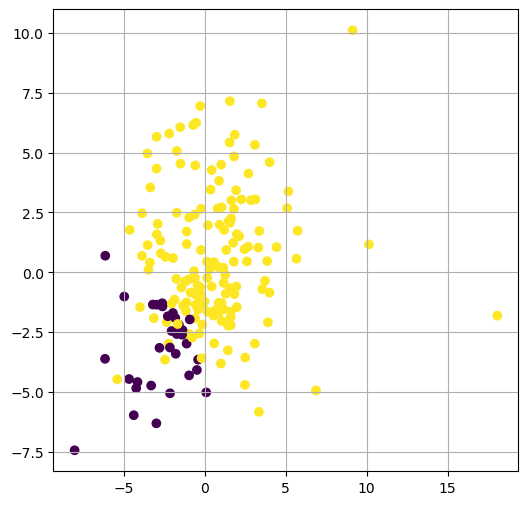

In [86]:
# plot the MDS results colored by the status of the country
plt.figure(figsize=(6,6))
plt.scatter(life_mds[:, 0], life_mds[:, 1],c=life_expectancy_2010["Status"].astype('category').cat.codes)
plt.grid(True)
plt.show()

**Question**: Explain the relationship between the `status` and the two dimentions of the MDS.

Answer: Developing points (yellow) are spread indicating variability.
Developed (purple) are closer between them and to 0.0 with less variation. 
Yellow points are closter closey, indicates the MDS capture differences in the status.
Developed and developing are separated, this suggest differences in status.

**Question**: (Bonus) Eplain the relationship between continent and the two dimension of the MDS.

Answer:

Now perform the same steps but use the non-metric MDS. 

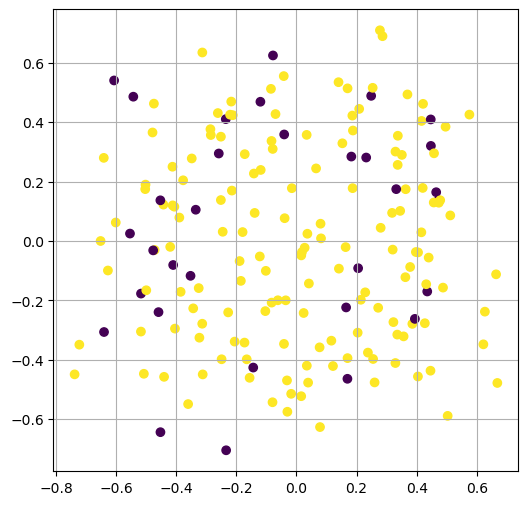

In [87]:
# Perform non-metric MDS and plot the result
# import the MDS method
from sklearn.manifold import MDS
# create an instance of a metric MDS method with 2 dimensions
mds = MDS(n_components=2, normalized_stress=False,metric=False)
# fit it to the data and transform the data. 
life_mds = mds.fit_transform(scaled_data)
# plot the MDS results colored by the status of the country
plt.figure(figsize=(6,6))
plt.scatter(life_mds[:, 0], life_mds[:, 1],c=life_expectancy_2010["Status"].astype('category').cat.codes)
plt.grid(True)
plt.show()

**Question**: Does the non-metric MDS result in a differnt solution? How do the non-metric and metric MDS compare? 

Answer:Yes, this differ from the previous result. Points are distributed all over the place evenly.
MDS clearly separete the groups while non metric MDS mix the groups.
This is because MDS reduce dimensionality while perserving distances while non metric doesnt, focuses on ranking (ordinal relationships) rather than preserving exact distances, leading to a less defined separation of groups.


### 4. t-SNE

Third you will perform t-SNE on the dataset that you prepared. Perform the following steps:

1. Import the t-SNE method.
2. Create an instance of the t-SNE method that results in 2 dimensions. Use default parameter values.  
3. Fit the instance to the data and transform it.  
4. Plot the datapoints with resepct to the two dimensions.   

In [88]:
# import the t-SNE method
from sklearn.manifold import TSNE
# create an instance of a metric t-SNE method with 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, init="random", learning_rate="auto",
            random_state=42)
# fit it to the data and transform the data. 
life_tsne = tsne.fit_transform(scaled_data)

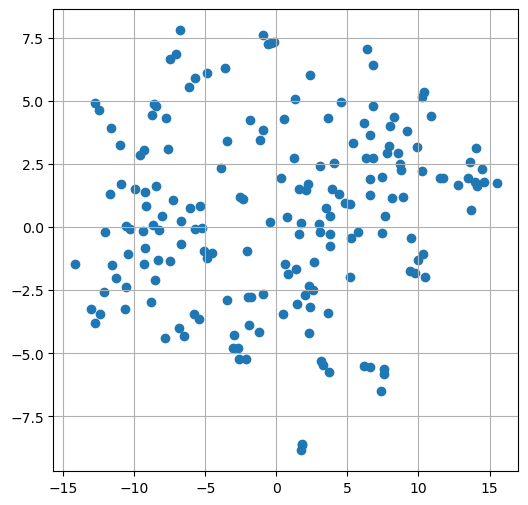

In [89]:
# plot the t-SNE results 
plt.figure(figsize=(6,6))
plt.scatter(life_tsne[:, 0], life_tsne[:, 1])
plt.grid(True)
plt.show()

Next, play around with the values of the parameters `perplexity` and `learning_rate`. Fit different instances of t-SNE to the data and plot the results. 

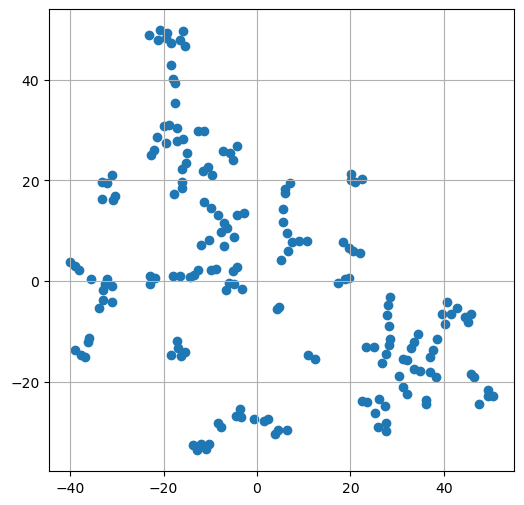

In [90]:
# code for t-SNE with various perplexities and learning rates.
tsne = TSNE(n_components=2, perplexity=5, init="random", learning_rate='auto',
            random_state=42)
# fit it to the data and transform the data. 
life_tsne = tsne.fit_transform(scaled_data)
# plot the t-SNE results 
plt.figure(figsize=(6,6))
plt.scatter(life_tsne[:, 0], life_tsne[:, 1])
plt.grid(True)
plt.show()

Low perplexity, local focused

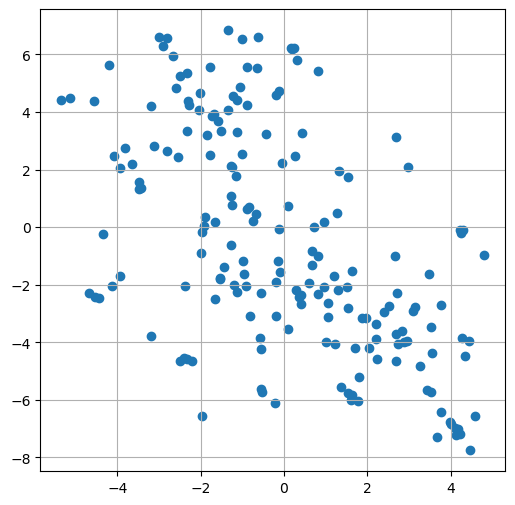

In [91]:
# code for t-SNE with various perplexities and learning rates.
tsne = TSNE(n_components=2, perplexity=50, init="random", learning_rate='auto',
            random_state=42)
# fit it to the data and transform the data. 
life_tsne = tsne.fit_transform(scaled_data)
# plot the t-SNE results 
plt.figure(figsize=(6,6))
plt.scatter(life_tsne[:, 0], life_tsne[:, 1])
plt.grid(True)
plt.show()

High perplexity, global focused

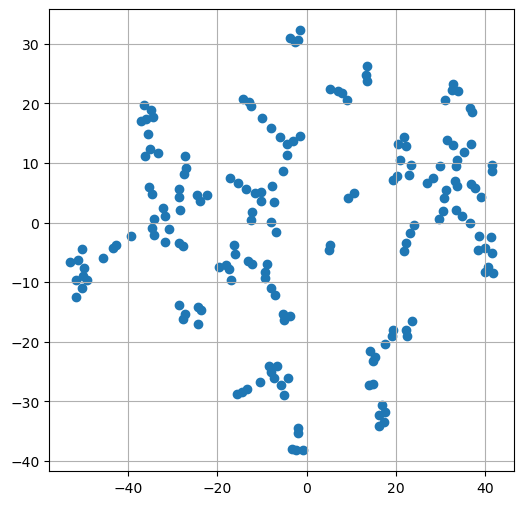

In [92]:
# code for t-SNE with various perplexities and learning rates.
tsne = TSNE(n_components=2, perplexity=5, init="random", learning_rate=10,
            random_state=42)
# fit it to the data and transform the data. 
life_tsne = tsne.fit_transform(scaled_data)
# plot the t-SNE results 
plt.figure(figsize=(6,6))
plt.scatter(life_tsne[:, 0], life_tsne[:, 1])

plt.grid(True)
plt.show()

Low learning rate, small changes, bad local minimal

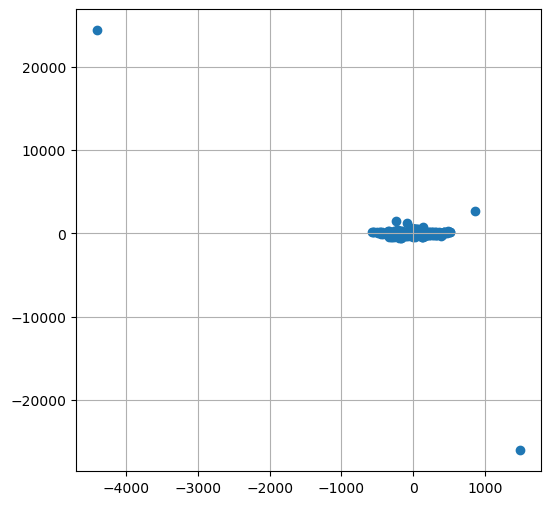

In [93]:
# code for t-SNE with various perplexities and learning rates.
tsne = TSNE(n_components=2, perplexity=5, init="random", learning_rate=1000,
            random_state=42)
# fit it to the data and transform the data. 
life_tsne = tsne.fit_transform(scaled_data)
# plot the t-SNE results 
plt.figure(figsize=(6,6))
plt.scatter(life_tsne[:, 0], life_tsne[:, 1])
plt.grid(True)
plt.show()

High learning rate, big changes, unstable results

**Question**: How does the perpexity parameter change the result of the t-SNE?

Answer:
*Perplexity controls the balance between local and global structure*
Larger perplexities (zoom out) are less sensitive to local small structures (wider neighborhood).
Lower perplexities (zoom in) are local focused, take in account smaller neighborhoods and agnore global information (close neighborhood). 

**Question**: How does the learning rate parameter change the restul of the t-SNE?

Answer: 
Learning rate create a low-dimensional map (2D or 3D) where distances between points reflect the relationships in the original high-dimensional data.
Low learning rate provide small updates, which leads to slow convergence and risk to get stuck in bad local minimal.
High learning rate allows faster updates but risk overshooting, leading to unstable results.

Select an 'optimal' t-SNE (i.e. with good values for the parameters perpelxity and learning rate). Plot the two dimensions and color the datapoints based on status and contient (bonus). 


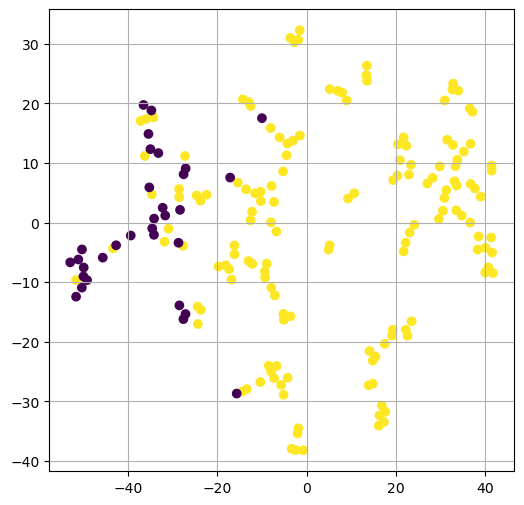

In [94]:
# plot the tSNE

tsne = TSNE(n_components=2, perplexity=5, init="random", learning_rate=10,
            random_state=42)
# fit it to the data and transform the data. 
life_tsne = tsne.fit_transform(scaled_data)
# plot the t-SNE results 
plt.figure(figsize=(6,6))
plt.scatter(life_tsne[:, 0], life_tsne[:, 1],c=life_expectancy_2010["Status"].astype('category').cat.codes)

plt.grid(True)
plt.show()

**Question**: What insights can you derive from these plots? 

Answer: There are 5 different clusters with both developed and developing points, which make me think each one of those clusters is for each continent. In each one of them it can be seen overlaping (mostly yellow) whith some purple, points more spreaded.

### 5. Comparison

Compare the restuls of the 3 methods: PCA, MDS and t-SNE. Discuss their capability of capturing variation in the data, clustering it and if they are able to distinguish status ( and continent if you are using it).

Answer: There exist several differences between those methods.
PCA help to visualise global variation but is not clear when we want to chek on specific cases or local information.
MDS show local and global variation (hole picture).
t-SNE provide all the information, pointing on the larger clusters but also showing the local relations (groups).